# World Happiness Project


### we need to predict the happiness score considering all the other factors mentioned in the dataset
###  LinearRegressionModel

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read csv file
data = pd.read_csv('happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#check columns
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
# how big is the dataset
data.shape

(158, 12)

In [5]:
# check the null values
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
# statistics of the dataset
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
# Observations:
#1) there is no null values
#2) after looking into all the data i think its ok 
#3) i will remove happiness rank column because it is useless and it act like a numbering to row

In [8]:

data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

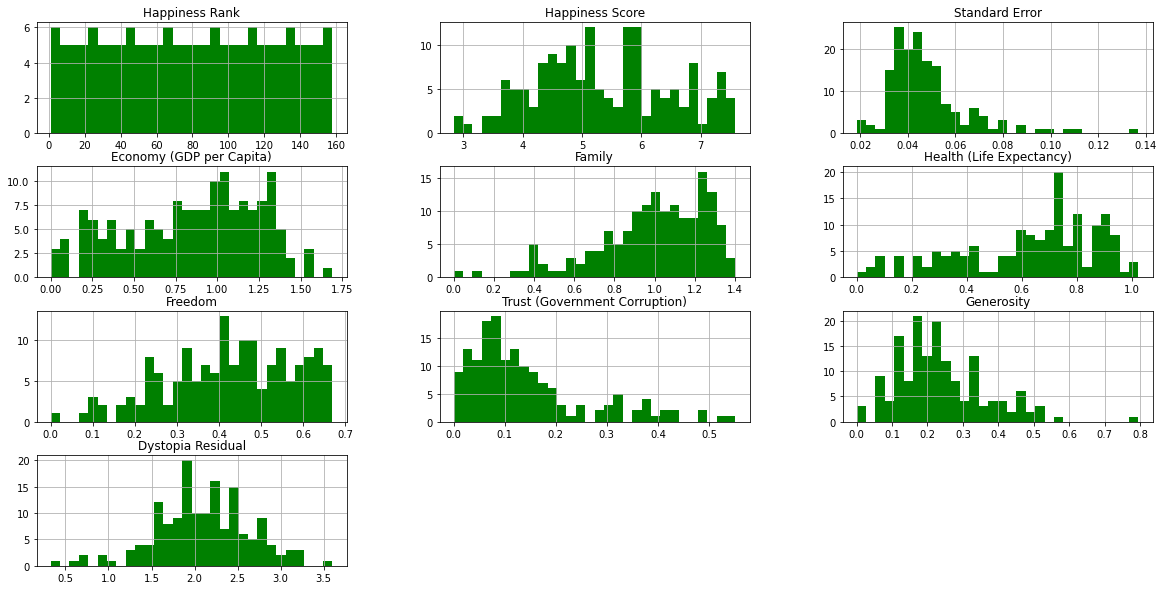

In [9]:
# analyzing the data
data.hist(color='g',figsize=(20,10),bins=30)
plt.show

# in this we see some data is scattered

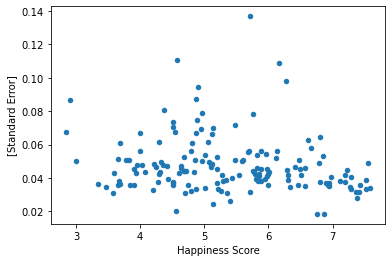

In [10]:
data.plot(x="Happiness Score", y=["Standard Error"],kind="scatter")
plt.show()
# we see some data is scattered (skewed) between happiness score vs Standard Error

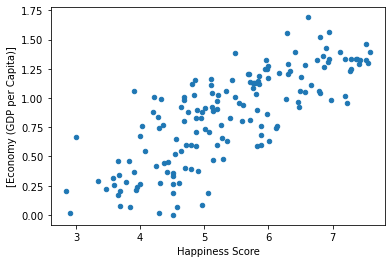

In [11]:
data.plot(x="Happiness Score", y=["Economy (GDP per Capita)"],kind="scatter")
plt.show()
## we see some trend between happiness score vs Economy

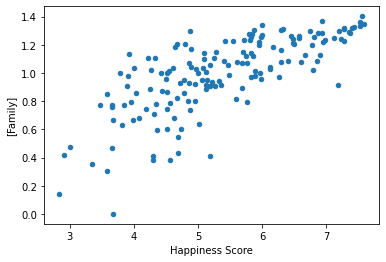

In [12]:
data.plot(x="Happiness Score", y=["Family"],kind="scatter")
plt.show()
# we see some trend between happiness score vs family

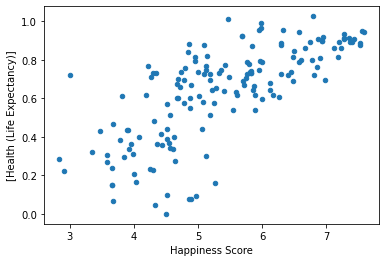

In [13]:
data.plot(x="Happiness Score", y=["Health (Life Expectancy)"],kind="scatter")
plt.show()
# we see some trend between happiness score vs Heal

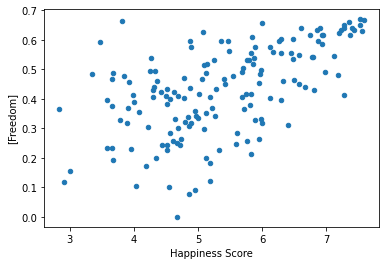

In [14]:
data.plot(x="Happiness Score", y=["Freedom"],kind="scatter")
plt.show()
# we see some trend between happiness score vs freedom

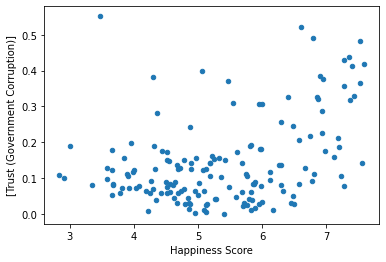

In [15]:
data.plot(x="Happiness Score", y=["Trust (Government Corruption)"],kind="scatter")
plt.show()
# we see some data is scattered (skewed) between happiness score vs Trust 

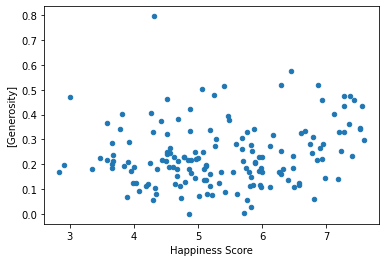

In [16]:
data.plot(x="Happiness Score", y=["Generosity"],kind="scatter")
plt.show()
## we see some data is scattered(skewed) between happiness score vs Generosity

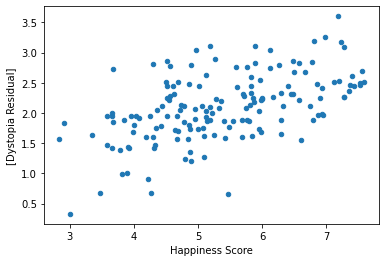

In [17]:
data.plot(x="Happiness Score", y=["Dystopia Residual"],kind="scatter")
plt.show()
# we see some trend between happiness score vs Dystopia Residual

In [18]:
#spliting the data into dependent variable and independent variable
X=data.drop(columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score'],axis=1)
y=data['Happiness Score']

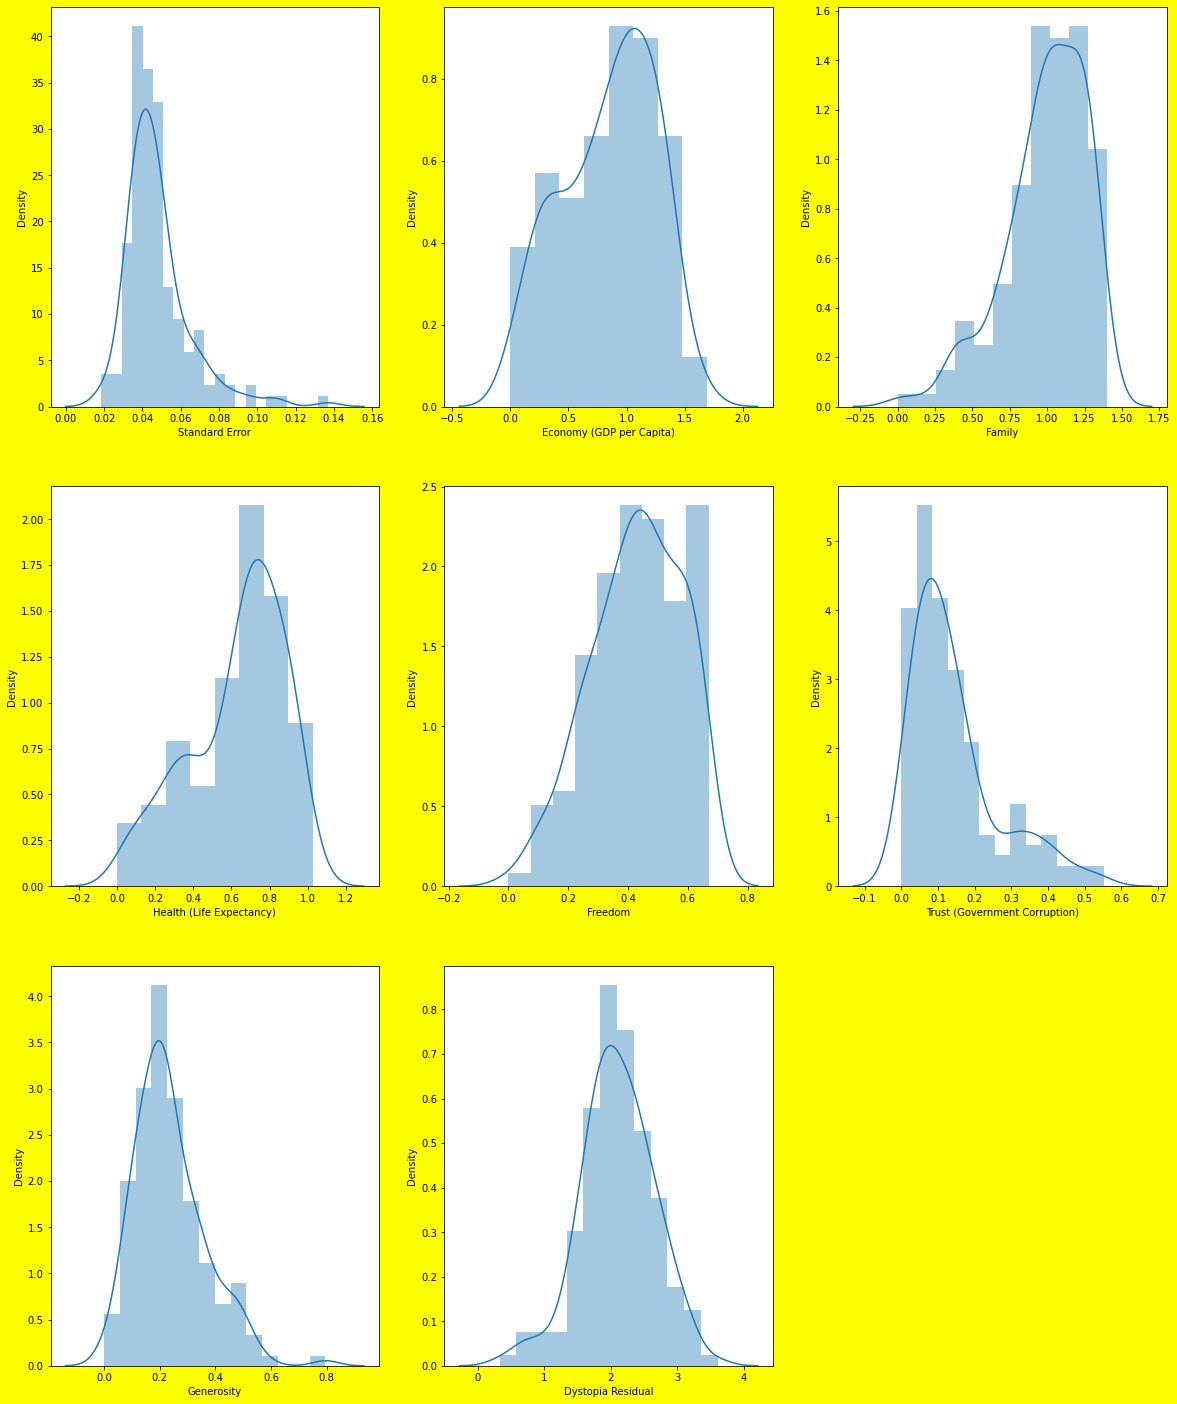

In [19]:
# lets see how data is distributed
plt.figure(figsize=(20,25) , facecolor='yellow')
plotnumber = 1

for column in X:
    
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

In [20]:
#skewness in terms of number
X.skew().sort_values(ascending=False)

Standard Error                   1.983439
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Economy (GDP per Capita)        -0.317575
Freedom                         -0.413462
Health (Life Expectancy)        -0.705328
Family                          -1.006893
dtype: float64

In [21]:
#applying Power Transformation beacuse our dataset is small and we want to keep outlier
from sklearn.preprocessing import power_transform , PowerTransformer
pt=PowerTransformer()

In [22]:
#transformed data
X_scaled=pt.fit_transform(X)
X_scaled

array([[-0.9722262 ,  1.44606101,  1.66920633, ...,  1.77399061,
         0.62239051,  0.75099154],
       [ 0.30934969,  1.17332111,  2.01213244, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-1.06201662,  1.23983557,  1.73958573, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [ 0.39913742, -0.5134688 , -1.69066357, ...,  0.73891461,
         1.65933595, -2.86621557],
       [ 1.92690194, -1.89495386, -1.79680304, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 1.31032295, -1.52122584, -2.16039658, ..., -0.06732623,
        -0.49041465, -0.97664547]])

In [23]:
#again checking the skewness
pd.DataFrame(X_scaled,columns=X.columns).skew().sort_values(ascending=False)

Trust (Government Corruption)    0.185965
Dystopia Residual                0.022925
Generosity                       0.013320
Standard Error                  -0.020092
Freedom                         -0.080728
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
dtype: float64

In [24]:
#we will convert numpy array into dataframe
X_new=pd.DataFrame(X_scaled,columns=X.columns)

In [25]:
X_new.skew().sort_values(ascending=False)

Trust (Government Corruption)    0.185965
Dystopia Residual                0.022925
Generosity                       0.013320
Standard Error                  -0.020092
Freedom                         -0.080728
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
dtype: float64

In [26]:
#y=data['Happiness Score']

In [27]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,11):
    X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)
        

Training Score 0.9916407503382842 RandomState 0
Testing Score 0.9940345302510685 RandomState 0


MAXINING TESTING SCORE 0.9940345302510685 ON RANDOM STATE OF 0
Training Score 0.9923719891745598 RandomState 1
Testing Score 0.9901406897573897 RandomState 1


Training Score 0.9916436351795682 RandomState 2
Testing Score 0.9920818427746075 RandomState 2


Training Score 0.9911784460870166 RandomState 3
Testing Score 0.993630136765512 RandomState 3


Training Score 0.9909291933080244 RandomState 4
Testing Score 0.9938228299829527 RandomState 4


Training Score 0.9922863866926971 RandomState 5
Testing Score 0.9906463184160221 RandomState 5


Training Score 0.9907160861218112 RandomState 6
Testing Score 0.9954846871242079 RandomState 6


MAXINING TESTING SCORE 0.9954846871242079 ON RANDOM STATE OF 6
Training Score 0.9925167040248101 RandomState 7
Testing Score 0.9900531470240674 RandomState 7


Training Score 0.9935814567533967 RandomState 8
Testing Score 0.9880645821683377 RandomState 8


Tr

In [28]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.9954846871242079 On Random State 6


In [29]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=6)

In [30]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.# 

In [31]:
#training score
regression.score(X_train,y_train)  

0.9907160861218112

In [32]:
#testing score
regression.score(X_test,y_test) 

0.9954846871242079

In [33]:
# Training Score = 99.07160861218112%
# Testing Score =  99.54846871242079%

In [34]:
y_pred=regression.predict(X_test)
y_pred

array([7.38124678, 7.51402601, 4.70906765, 5.09513256, 5.88820313,
       4.62811597, 7.4716999 , 7.6803683 , 5.06066711, 6.179648  ,
       5.03213299, 5.97448085, 4.53078513, 6.50550921, 4.26994824,
       3.85861938, 5.6660387 , 4.82435779, 4.590963  , 3.97771255,
       5.27338414, 6.83333975, 4.03062823, 5.78978233, 4.68551635,
       4.69293377, 3.76519374, 4.14776543, 6.17476755, 5.64700631,
       6.33413208, 5.48167528, 6.74920532, 6.31888311, 6.46482663,
       7.06220059, 4.94656831, 3.930563  , 7.01307388, 7.16858326])

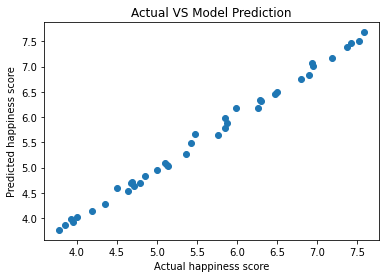

In [35]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual happiness score')
plt.ylabel('Predicted happiness score')
plt.title('Actual VS Model Prediction')
plt.show()

In [36]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [37]:
# again predict 
y_pred = regression.predict(X_test)

In [38]:
#MAE
mean_absolute_error(y_test,y_pred)

0.06041638987350144

In [39]:
#MSE
mean_squared_error(y_test,y_pred)

0.005837769876800197

In [40]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.07640530005699996

In [41]:
#now we sucessfully created model and our score is great so we check it for overfitting 
#to check overfitting we have to use regularization technique

# in regularization we have 3 type but we use only 2 



# 3 types are 1) LASSO (L1 form) 2)RIDGE (L2 FORM)  3)ELASTIONET

In [42]:
#BASICALLY LASSO N RIDGE WILL GIVE YOU BEST LEARNING RATE THAT IS ALPHA SCORE AND TRAIN MODEL ACCORDING TO IT

In [43]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# LASSO MODEL

In [44]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100, normalize = True)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100, normalize=True)

In [45]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

0.00044422141401781874

In [46]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.00044422141401781874)

In [47]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.9955233955514966

# RIDGE MODEL

In [48]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(X_train , y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [49]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.001

In [50]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.001)

In [51]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.9954846849393908

In [52]:
# LASSO SCORE = 99.55233955514966%
# RIDGE SCORE = 99.54846849393908%

In [53]:
# after seeing LASSO and RIDGE score thus we can conclude that our model was not overfitted model
## for conformation lets see cross validation of the model

# Cross Vaildation

In [54]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X_new,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.8291492271638914 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242079


At cross fold 3 the cv score is 0.859762222768806 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242079


At cross fold 4 the cv score is 0.8051007531385044 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242079


At cross fold 5 the cv score is 0.771932693634106 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242079


At cross fold 6 the cv score is 0.6456219680627289 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242079


At cross fold 7 the cv score is 0.5441729537870265 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242079


At cross fold 8 the cv score is 0.5133460265810152 and the R2 score for 

# as we see all are giving same result so out model is best model without overfitting 

# Training Score for Linear Regression = 99.07160861218112%
# Testing Score for Linear Regression =  99.54846871242079%